集成学习是一种通过组合多个分类器来提高模型性能的方法，通常包括以下两种主要思想：

- **Bagging（装袋法）**：通过对训练数据的重采样，构建多个弱学习器，最终通过投票或平均来决定预测结果。
- **Boosting（提升法）**：通过逐步优化构建多个弱学习器，每个学习器修正前一个学习器的错误，最终将多个学习器的结果进行加权组合。

### **集成学习中的主要模型**

以下是集成学习的所有主要模型及其概述：

---

#### **1. Bagging (Bootstrap Aggregating)**
- 使用重采样的方法从训练数据中生成多个子集。
- **模型**：
  - BaggingClassifier
  - RandomForestClassifier
  - ExtraTreesClassifier

---

#### **2. Boosting**
- 基于加权训练的思想，逐步优化学习器。（~~之前树结构模型已经讨论过，这里不再赘述~~）
- **模型**：
  - AdaBoostClassifier
  - GradientBoostingClassifier
  - XGBoost
  - LightGBM
  - CatBoost

---

#### **3. Voting (Voting Classifier)**
- 集成多个模型的预测结果，通过投票（硬投票或软投票）得出最终结果。
- **模型**：
  - VotingClassifier

---

#### **4. Stacking (Stacked Generalization)**
- 使用多个基础模型的预测结果作为新的特征，训练一个元模型来进行最终的预测。
- **模型**：
  - StackingClassifier



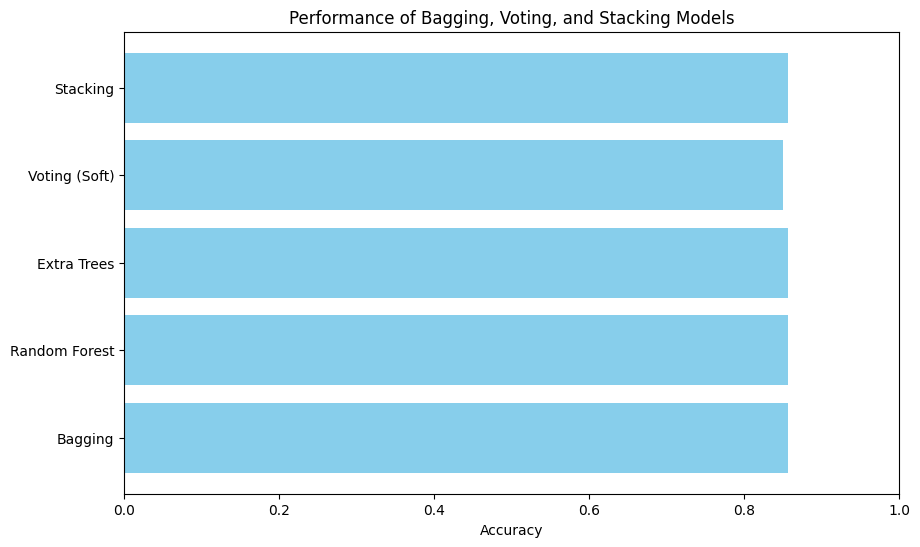

Bagging: 0.8567
Random Forest: 0.8567
Extra Trees: 0.8567
Voting (Soft): 0.8500
Stacking: 0.8567


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    random_state=42
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Bagging": BaggingClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "Voting (Soft)": VotingClassifier(estimators=[  # 这里将三种不同的模型进行结合，并投票分类，参数可以选择硬投票（多数票）或者软投票（概率平均投票）
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True))
    ], voting='soft'),
    "Stacking": StackingClassifier(estimators=[ # 使用多个基础模型的预测结果作为特征，训练一个元模型进行最终分类。
        ('lr', LogisticRegression()),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True))
    ], final_estimator=LogisticRegression())
}

# Train, predict and evaluate all models
results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    except Exception as e:
        results[name] = f"Failed: {str(e)}"

# Plot results
plt.figure(figsize=(10, 6))
names = list(results.keys())
accuracies = [results[name] if isinstance(results[name], float) else 0 for name in names]

plt.barh(names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Performance of Bagging, Voting, and Stacking Models")
plt.xlim(0, 1.0)
plt.show()

# Print accuracies
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}" if isinstance(accuracy, float) else f"{name}: {accuracy}")


### **模型特点、适用场景及优缺点**

#### **1. Bagging**
- **特点**：
  - 通过对训练数据进行重采样构建多个弱学习器（如决策树），最终通过投票或平均结合结果。
  - 核心思想是减少方差，增强模型的鲁棒性。

- **适用场景**：
  - 数据较大，且特征间独立性较强的情况。
  - 简单分类任务，如二分类或多分类。

- **优点**：
  - 减少过拟合风险。
  - 易于并行化，训练速度快。

- **缺点**：
  - 需要足够多的数据进行重采样。
  - 在样本较少时，模型性能可能下降。

---

#### **2. Random Forest**
- **特点**：
  - Bagging 的改进，使用多个随机选择特征的决策树组合。
  - 每棵树在构造时只使用部分特征和样本，增加了模型的多样性。

- **适用场景**：
  - 特征维度较高，且需要分析特征重要性的任务。
  - 数据较大，目标是提高分类或回归性能。

- **优点**：
  - 自动计算特征重要性。
  - 对缺失值有一定鲁棒性。

- **缺点**：
  - 对超大规模数据集，内存占用可能较高。
  - 无法很好地处理复杂边界问题。

---

#### **3. Extra Trees**
- **特点**：
  - 与 Random Forest 类似，但在每次分裂时，完全随机选择分裂点。
  - 增强了模型的随机性，进一步减少了过拟合。

- **适用场景**：
  - 任务特征复杂度较高的场景。
  - 希望进一步降低过拟合的任务。

- **优点**：
  - 训练速度更快。
  - 模型具有更强的泛化能力。

- **缺点**：
  - 随机性较高，可能导致个别结果不稳定。
  - 解释性稍弱于 Random Forest。

---

#### **4. VotingClassifier**
- **特点**：
  - 通过结合多个模型的预测结果，进行投票分类。
  - 支持硬投票（多数票）和软投票（预测概率的平均值）。

- **适用场景**：
  - 单一模型效果不佳，需要组合多个模型提升性能的场景。

- **优点**：
  - 易于实现，可结合不同模型的优点。
  - 对单一模型的过拟合风险较低。

- **缺点**：
  - 需要多个高性能模型，训练时间较长。
  - 模型组合设计复杂，可能需要反复试验。

---

#### **5. StackingClassifier**
- **特点**：
  - 使用多个基础模型的预测结果作为特征，训练一个元模型进行最终分类。
  - 理论上能够获得更高的性能。

- **适用场景**：
  - 数据复杂，需要多模型融合的场景。
  - 希望最大化利用不同模型的特性。

- **优点**：
  - 能将多个模型的优点整合，性能提升显著。
  - 灵活性强，可自由选择基础模型和元模型。

- **缺点**：
  - 模型复杂，训练时间较长。
  - 调参和组合设计难度较大。

---

### **总结对比表**

| **模型**                | **特点**                                  | **适用场景**                     | **优点**                              | **缺点**                              |
|-------------------------|-------------------------------------------|----------------------------------|---------------------------------------|---------------------------------------|
| **Bagging**             | 重采样生成多个子模型，结果平均或投票       | 特征独立，简单任务               | 减少过拟合，易并行化                  | 样本不足时效果下降                   |
| **Random Forest**       | Bagging 改进，随机选择样本和特征          | 高维特征，需分析特征重要性       | 自动特征重要性计算，对缺失值鲁棒性强  | 内存占用高，复杂边界处理较差         |
| **Extra Trees**         | 与 Random Forest 类似，分裂点完全随机      | 特征复杂，需降低过拟合的场景      | 训练速度快，泛化能力强                | 随机性高，结果可能不稳定             |
| **VotingClassifier**    | 多模型结果投票                           | 单一模型效果不足                 | 结合多个模型优点，减少过拟合          | 需要多个模型，训练时间长             |
| **StackingClassifier**  | 组合多个模型，训练元模型进行最终分类      | 复杂任务，多模型融合需求          | 性能高，灵活性强                      | 模型复杂，调参和设计难度大           |

---

### **选型建议**
- **简单任务**：选择 `Bagging` 或 `Random Forest`。
- **多模型融合**：选择 `VotingClassifier` 或 `StackingClassifier`。
- **降低过拟合需求**：选择 `Extra Trees`。
- **特征重要性分析**：选择 `Random Forest`。
